# GA DSI Capstone Project - Malware Classification
***

# Introduction
Malware is intrusive software that is designed to damage and destroy computers and computer systems. The main purpose of malware is to gain personal or restricted information or to damage the device for financial gains. Delivery methods for malware can differ significantly and can involve a combination of different delivery methods like phishing or social engineering. Some common example of malware includes viruses, worms, Trojan viruses, spyware, adware, and ransomware.

According to research done by Cybercrime Magazine, it is estimated that cybercrime will be costing the world up to USD 10.5 trillion annually by 2025. This figure has increased significantly from USD3 trillion in 2015. The transition to remote working conditions during the pandemic have also further increase the rate of attacks to users and employees of businesses.

# Problem Statement

For this project, the perspective would be that I am an data analyst in an PC operating system company tasked to look at the trend of malware attacks and the factors that would be influencing this trend. 

The problem statement would be to develop a model that is able to predict if a machine has being infected by malware based on the different properties of that machine and to identify which features are important to malware prediction and propose recommendations accordingly. 

***
# Executive Summary

The dataset contains 8.9 million rows and 83 features containing various parameters and properties of the machines that are general by Microsoft's endpoint protection solution, Windows Defender.

After data cleaning, EDA and feature selection, a total of 29 features are used for modeling and the other features (other than the dependent variable and unique Machine Identifier are removed or dropped. 

Using a mix of linear model, tree-based models and neural network, a total of 5 models are used as candidates for this binary classification problem. 

The baseline model would be the class balance of the dependent variable (`HasDetections`) which is as follow:
- Class 0 (no malware detected): 0.499
- Class 1 (malware detected): 0.500

Thus, the baseline model shall be 0.50 which is the score that the models would be aiming to beat.

Taking a sample of 100,000 rows randomly from the `train` dataset for modeling, below is the table of results for the models ran. 

|        **Models**        | **Train AUC ROC** | **Test AUC ROC** | **Precision** | **Recall** | **F-score** |
|:------------------------:|:-----------------:|:----------------:|:-------------:|:----------:|:-----------:|
| Logistic Regression      |       0.665       |       0.668      |     0.627     |    0.593   |    0.609    |
| K-Neighbors Classifier   |       0.681       |       0.633      |     0.599     |    0.580   |    0.589    |
| Random Forest Classifier |       0.745       |       0.678      |     0.642     |    0.581   |     0.61    |
| Light GBM                |       0.706       |       0.682      |     0.641     |    0.599   |    0.619    |
| Keras Sequential NN      |       0.700       |       0.671      |     0.656     |    0.619   |     N/A     |

Looking at the context of this classification problem, the consequence of not identifying a false negative (i.e. not identifying the malware when there is malware on the machine) is more serious that getting a false positive (i.e. identifying the presence of a malware when there is no malware presence) as the only cost is some time needed to scan the machine and rectify compared to the consequences of having a malware on the machine. Some of the consequences of having malware include slowing connection, slowing down the performance of your machine, identify theft from personal information and hackers gaining access to the machine.

From the above table of model results, and looking at the AUC ROC scores and Recall scores, the best model would be the Light GBM model as it has the best test AUC ROC score at 0.682 as well as the best recall score 0.599. A possible reason that Light GBM can perform better is that Light GBM is a variant of Gradient Boosting Classifier, it is able to naturally handle of mixed data types, good predictive power and robustness to outliers. 

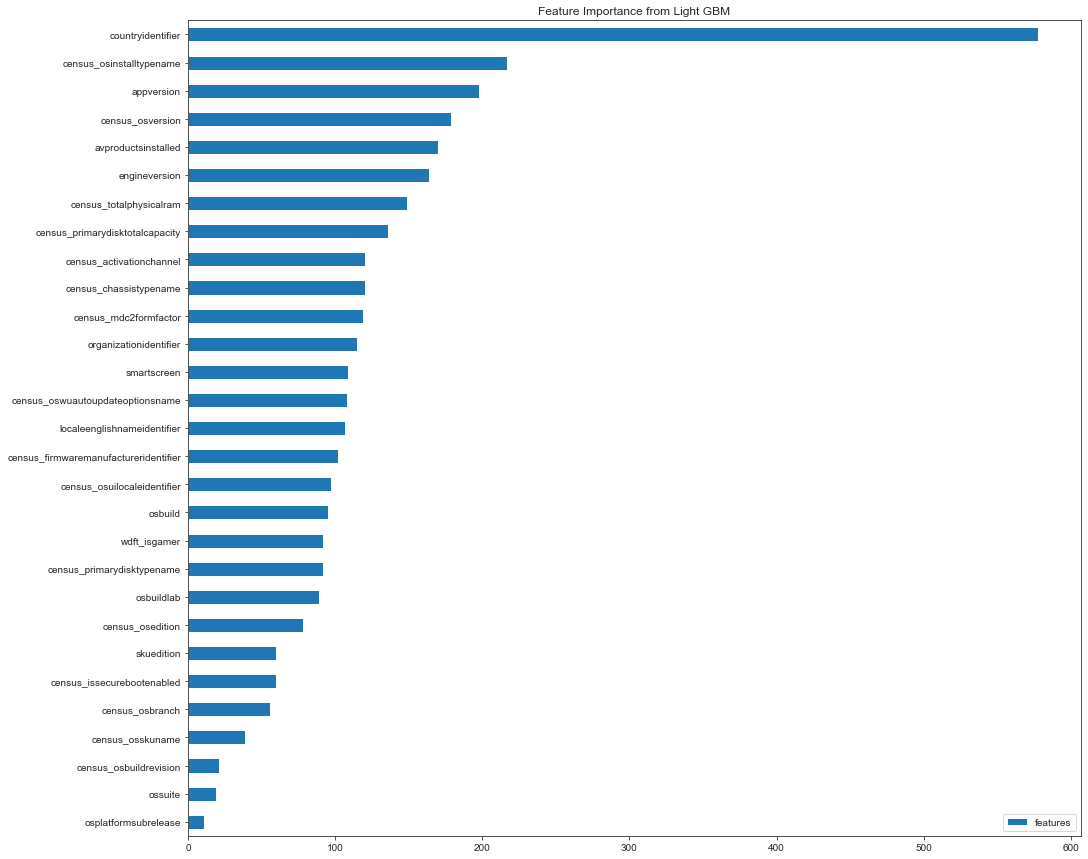

Looking at the feature importance for the Light GBM model, the feature that is most impactful to the modeling process is the `countryidentifier` feature followed by the type of installation of the operating system (OS) and the app version. This feature importance would only inform of the features' importance to the model in general and not specific to each class. 

However, there are still some limitations to the best model at the test AUC ROC score is only 0.68 which means that there are 32% of the data that is incorrectly classified. This could be due to that due to limitations in hardware and time, the modeling is done on 100,000 rows and this could cause a loss of some hidden trends or patterns within the data that can affect the modeling score. Some features have been masked for confidentiality reasons like `Country Identifier` feature is masked and this could affect the way the encoding could have been done which might yield better results. Inherently, malware detection is also a time-series issue as there are different versions of operating system and software. The datetime feature of when the data are scraped are not provided thus there is another layer of information that could be lost. These can be addressed in furture works to improve the models. 

Some recommendations for the company:
- Using the feature importances from the models tested, the company can focus additional efforts in devising stronger security protocols or solutions for industries, countries or certain OS build versions that are more vulnerable to malware attacks. 
- The company can look to recommend users in regions and industries that could be more vulnerable to malware attacks to upgrade the operating system for more security features based on this model results.

***
# Data Dictionary

The `train` and `test` datasets can be downloaded from this [link](https://www.kaggle.com/c/microsoft-malware-prediction/data).  The `train_cleaned` and `test_cleaned` datasets can be downloaded from this [link](https://drive.google.com/drive/folders/1VGJ_zgwIYW1QNhXLvoKGSUiC1HZ5uSHM?usp=sharing).

The following table is the data dictionary for the final cleaned `train` dataset that will be used for modeling. The various descriptions are obtained from [Kaggle Competition page](https://www.kaggle.com/c/microsoft-malware-prediction/data).

|              **Feature**              | **Type** |                                                                                                                                        **Description**                                                                                                                                       |
|:-------------------------------------:|:--------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|             engineversion             | category | Defender state information e.g. 1.1.12603.0                                                                                                                                                                                                                                                  |
|               appversion              | category | Defender state information e.g. 4.9.10586.0                                                                                                                                                                                                                                                  |
|          avproductsinstalled          |   float  | Number of anti-virus products installed                                                                                                                                                                                                                                                      |
|           countryidentifier           |    int   | ID for the country the machine is located in                                                                                                                                                                                                                                                 |
|         organizationidentifier        |   float  | ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries                                                                                                                                                                    |
|      localeenglishnameidentifier      |    int   | English name of Locale ID of the current user                                                                                                                                                                                                                                                |
|                osbuild                |    int   | Build of the current operating system                                                                                                                                                                                                                                                        |
|                ossuite                |    int   | Product suite mask for the current operating system.                                                                                                                                                                                                                                         |
|          osplatformsubrelease         | category | Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)                                                                                                                                                                                                          |
|               osbuildlab              | category | Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022                                                                                                                                                                                                 |
|               skuedition              | category | The goal of this feature is to use the Product Type defined in the MSDN to  map to a 'SKU-Edition' name that is useful in population reporting.                                                                                                                                              |
|              smartscreen              | category | This is the SmartScreen enabled string value from registry.                                                                                                                                                                                                                                  |
|         census_mdc2formfactor         | category | A grouping based on a combination of Device Census level hardware characteristics. The logic used to define  Form Factor is rooted in business and industry standards and aligns with how people think about their device.  (Examples: Smartphone, Small Tablet, All in One, Convertible...) |
|    census_primarydisktotalcapacity    |   float  | Amount of disk space on primary disk of the machine in MB                                                                                                                                                                                                                                    |
|       census_primarydisktypename      | category | Friendly name of Primary Disk Type - HDD or SSD                                                                                                                                                                                                                                              |
|        census_totalphysicalram        |   float  | Retrieves the physical RAM in MB                                                                                                                                                                                                                                                             |
|         census_chassistypename        | category | Retrieves a numeric representation of what type of chassis the machine has.                                                                                                                                                                                                                  |
|            census_osversion           | category | Numeric OS version Example - 10.0.10130.0                                                                                                                                                                                                                                                    |
|            census_osbranch            | category | Branch of the OS extracted from the OsVersionFull. \ Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005                                                                                                                                |
|         census_osbuildrevision        |    int   | OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458                                                                                                                                                                                                |
|            census_osedition           | category | Edition of the current OS. Example: Enterprise                                                                                                                                                                                                                                               |
|            census_osskuname           | category | OS edition friendly name (currently Windows only)                                                                                                                                                                                                                                            |
|        census_osinstalltypename       | category | Friendly description of what install was used on the machine i.e. clean                                                                                                                                                                                                                      |
|      census_osuilocaleidentifier      |   float  | Indicate the OS Ui locale identifier                                                                                                                                                                                                                                                         |
|    census_oswuautoupdateoptionsname   | category | Friendly name of the WindowsUpdate auto-update settings on the machine.                                                                                                                                                                                                                      |
|        census_activationchannel       | category | Retail license key or Volume license key for a machine.                                                                                                                                                                                                                                      |
| census_firmwaremanufactureridentifier |   float  | Identify firmware manufacturer.                                                                                                                                                                                                                                                              |
|       census_issecurebootenabled      |    int   | Indicates if Secure Boot mode is enabled.                                                                                                                                                                                                                                                    |
|              wdft_isgamer             |   float  | Indicates whether the device is a gamer device or not based on its hardware combination.                                                                                                                                                                                                     |

